In [1]:
from nbindex import floating
floating.tableofcontent()

dirtodataset='/v/courses/dataespviz2023.public/Datasets/D-NLP/'
dirtodataset='../../Datasets/D-NLP/'

## For previous topics

Datavisualization manuals:
* https://python-graph-gallery.com/
* https://www.data-to-viz.com/

# Regular expressions

The fastest way to find patterns in strings is to use a library that can match so-called regular expressions. In Python, it is the `re` library that does the trick, but regular expressions are also common in other languages, and the syntax remains almost identical in every case. 

You can even use regexp search and replace in most text editors, for example while editing LaTeX files, or code on your computer. `grep` and `sed` also understand regular expressions in the terminal. Thus, once mastered, regexps are going to appear in almost each and every one of your works or data cleaning. Below, some common everyday examples are shown, alongside with the Python usage.

As to learning the syntax, check out the first two links:

* This is a quite good introduction:
http://www.zytrax.com/tech/web/regex.htm

* This is a really good tutorial that shows how regular expressions match or do not match:
https://regexone.com/

* And this link covers Pythons regex library as a starter.
https://developers.google.com/edu/python/regular-expressions

### A cheat sheet

#### Some Definitions

* **literal** 	A literal is any character we use in a search or matching expression, for example, to find ind in windows the ind is a literal string - each character plays a part in the search, it is literally the string we want to find.
* **metacharacter** 	A metacharacter is one or more special characters that have a unique meaning and are NOT used as literals in the search expression, for example, the character ^ (circumflex or caret) is a metacharacter.
* **target string** 	This term describes the string that we will be searching, that is, the string in which we want to find our match or search pattern.
* **search expression** 	Most commonly called the regular expression. This term describes the search expression that we will be using to search our target string, that is, the pattern we use to find what we want.
* **escape sequence** 	An escape sequence is a way of indicating that we want to use one of our metacharacters as a literal. In a regular expression an escape sequence involves placing the metacharacter \ (backslash) in front of the metacharacter that we want to use as a literal, for example, if we want to find (s) in the target string window(s) then we use the search expression \(s\) and if we want to find \\file in the target string c:\\file then we would need to use the search expression \\\\file (each \ we want to search for as a literal (there are 2) is preceded by an escape sequence \).

* **\[ \]**  
Match anything inside the square brackets for ONE character position, once and only once. For example, [12] means match the target to 1 and if that does not match then match the target to 2 while [0123456789] means match to any character in the range 0 to 9.
* **-**  
The - (dash) inside square brackets is the 'range separator' and allows us to define a range, in our example above of [0123456789] we could rewrite it as [0-9].

* **^**  
The ^ (circumflex or caret) inside square brackets negates the expression (we will see an alternate use for the circumflex/caret outside square brackets later), for example, [^Ff] means anything except upper or lower case F and [^a-z] means everything except lower case a to z.

* **?**  
The ? (question mark) matches when the preceding character occurs 0 or 1 times only, for example, colou?r will find both color (u is found 0 times) and colour (u is found 1 time).
* **\***  
The * (asterisk or star) matches when the preceding character occurs 0 or more times, for example, tre* will find tree (e is found 2 times) and tread (e is found 1 time) and trough (e is found 0 times and thus returns a match only on the tr).
* **+**  
The + (plus) matches when the preceding character occurs 1 or more times, for example, tre+ will find tree (e is found 2 times) and tread (e is found 1 time) but NOT trough (0 times).

#### Backslash Sequences
* \d 	Match any character in the range 0 - 9 (equivalent of POSIX [:digit:])
* \D 	Match any character NOT in the range 0 - 9 (equivalent of POSIX [^[:digit:]])
* \s 	Match any whitespace characters (space, tab etc.). (equivalent of POSIX [:space:] EXCEPT VT is not recognized)
* \S 	Match any character NOT whitespace (space, tab). (equivalent of POSIX [^[:space:]]).
* \w 	Match any character in the range 0 - 9, A - Z, a - z and underscore (_) [0-9A-Za-z_]. Equivalent of POSIX [:word:])
* \W 	Match any character NOT the range 0 - 9, A - Z, a - z and punctuation (equivalent of POSIX [^[:graph:]])
#### Positional Abbreviations
* \b 	Word boundary. Match any character(s) at the beginning (\bxx) and/or end (xx\b) of a word, thus \bton\b will find ton but not tons, but \bton will find tons.
* \B 	Not word boundary. Match any character(s) NOT at the beginning(\Bxx) and/or end (xx\B) of a word, thus \Bton\B will find wantons but not tons, but ton\B will find both wantons and tons.

### The `re` library in Python

In [2]:
# importing the library
import re

This is a hello world example for the `re` library.

In [3]:
re.findall('\w+','apple pear plum cherries')

['apple', 'pear', 'plum', 'cherries']

In [4]:
re.findall('\w+','apple pear plum cherries are tasty!')

['apple', 'pear', 'plum', 'cherries', 'are', 'tasty']

The file `robinson.txt` contains Defoe's famous novel downloaded from the website of the [Project Gutenberg](http://www.gutenberg.org). Let's count how many times the pronoun `the` appears in the novel!

In [5]:
robinson = open(dirtodataset+'robinson.txt').read()

In [6]:
len(re.findall('the',robinson))

20623

Let's extract possible names beginning with a capital `F` from the novel.We exclude words that are supposed to be at the beginning of a sentence.

In [7]:
# this is a find and replace command for strings
# arguments are old_pattern, new_pattern, string
# returns substituted string
robinson_no_newlines = re.sub('\n',' ',robinson)

Because of the above excluding conditions, we check the preceding two characters of the names. But we would only like to return the names themselves without the preceding characters. Therefore, we use group capturing by putting brackets around the desired parts `()`, which makes sure that `re.findall` only returns the matched groups, not the whole pattern. If we capture more than one group, the returned list would contain tuples.

In [8]:
set(re.findall('[^\.!\?" ] (F[a-z]+)', robinson_no_newlines))

{'Father',
 'February',
 'Fernand',
 'Finland',
 'Firma',
 'First',
 'Flanders',
 'Fontarabia',
 'Formosa',
 'Fowling',
 'France',
 'French',
 'Frenchman',
 'Friday',
 'Frozen',
 'Frye',
 'Fyal'}

In [9]:
set(re.findall('[^\.!\?" ] (F[a-z]+)', robinson_no_newlines))

{'Father',
 'February',
 'Fernand',
 'Finland',
 'Firma',
 'First',
 'Flanders',
 'Fontarabia',
 'Formosa',
 'Fowling',
 'France',
 'French',
 'Frenchman',
 'Friday',
 'Frozen',
 'Frye',
 'Fyal'}

In [10]:
set(re.findall('[^\w][^\w]Friday[^\w][^\w]',robinson_no_newlines))

{'  Friday, ',
 ' "Friday, ',
 ' "Friday; ',
 ' "Friday? ',
 ', Friday!"',
 ', Friday, ',
 ', Friday,"',
 ', Friday?"',
 '; Friday, '}

### Some command line examples

In [11]:
!wc /v/courses/dataexpviz.public/Datasets/D-NLP/random.txt

    1 10000 50000 /v/courses/dataexpviz.public/Datasets/D-NLP/random.txt


Reformatting the output of `uniq -c`!

In [12]:
!cat /v/courses/dataexpviz.public/Datasets/D-NLP/random.txt | sed 's/ /\n/g' | sort -n | uniq -c |head

     45 0.00
    101 0.01
    103 0.02
    104 0.03
    109 0.04
     85 0.05
    101 0.06
     97 0.07
     99 0.08
    107 0.09


In [13]:
!cat /v/courses/dataexpviz.public/Datasets/D-NLP/random.txt | sed 's/ /\n/g' | sort -n | uniq -c | sed -e 's/^\s*//g' | sed -e 's/ /,/g' | head

45,0.00
101,0.01
103,0.02
104,0.03
109,0.04
85,0.05
101,0.06
97,0.07
99,0.08
107,0.09


Adding `0.` to floats smaller than `1`.

In [14]:
!cat /v/courses/dataexpviz.public/Datasets/D-NLP/sample.txt | sed -e 's/^\./0\./g'

# This is a sample file for illustration purposes.
# This is a comment line.
But this is not, it just happens to contain a '#'.
0.3
0.4
0.64
1.45
2.5


Excluding comment lines.

In [15]:
!cat /v/courses/dataexpviz.public/Datasets/D-NLP/sample.txt | grep -ve '^#'

But this is not, it just happens to contain a '#'.
.3
.4
.64
1.45
2.5


### How to feed a text to the computer?

First of all, we want to decide what elements we want as building blocks. A common approach is to break the text down to words. But even this task is not that simple as it first seems. The next string contains an example message of Donald Trump from the Twitter social network.

Possible problems:
* lower and uppercase
* punctuation
* emojis
* character encoding
* named entity recognition...

In [16]:
trump_tweet = 'Having great meetings and discussions with my friend, \
    President @EmmanuelMacron of France. We are in the midst of meetings \
    on Iran, Syria and Trade. We will be holding a joint press conference shortly, \
    here at the @WhiteHouse. 🇺🇸🇫🇷'

Does this work?

In [17]:
print(' '.join(re.findall('\w+',trump_tweet.lower())))

having great meetings and discussions with my friend president emmanuelmacron of france we are in the midst of meetings on iran syria and trade we will be holding a joint press conference shortly here at the whitehouse


# Natural Language Processing


## nltk
Natural Language Toolkit - https://www.nltk.org/

"NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora* and lexical resources such as [WordNet](https://wordnet.princeton.edu/), along with a suite of text processing libraries for classification[[1](https://monkeylearn.com/what-is-text-classification/)][[2](https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a)], tokenization[[1](https://www.geeksforgeeks.org/nlp-how-tokenizing-text-sentence-words-works/)][[2](https://text-processing.com/demo/tokenize/)], stemming[[1](https://www.geeksforgeeks.org/introduction-to-stemming/)][[2](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)], tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum."

\*all the writings or works of a particular kind or on a particular subject, especially the complete works of an author

In [18]:
import nltk
#nltk.download('punkt')

Let's have a look at our former task and find the pieces that carry any information

In [19]:
print(' '.join(nltk.word_tokenize(trump_tweet.lower())))

having great meetings and discussions with my friend , president @ emmanuelmacron of france . we are in the midst of meetings on iran , syria and trade . we will be holding a joint press conference shortly , here at the @ whitehouse . 🇺🇸🇫🇷


Look for a good tweet tokenizer that has Twitter-specific regular expressions built-in either within `nltk` or outside!
http://www.nltk.org/api/nltk.tokenize.html

## Tokenizers


In [20]:
from nltk.tokenize import WordPunctTokenizer

#  WordPunctTokenizer – It seperates the punctuation from the words.
tokenizer = WordPunctTokenizer() 
tokenizer.tokenize("Let's see how it's working.") 

['Let', "'", 's', 'see', 'how', 'it', "'", 's', 'working', '.']

In [21]:
from nltk.tokenize import TreebankWordTokenizer 

# These tokenizers work by separating the words using punctuation and spaces,
# and it does not discard the punctuation, allowing a user to decide 
# what to do with the punctuations at the time of pre-processing.

tokenizer = TreebankWordTokenizer() 
text = "Hello everyone. Welcome to this lecture! We have a pleasant sunny weather today, don't we?"
" | ".join(tokenizer.tokenize(text))

"Hello | everyone. | Welcome | to | this | lecture | ! | We | have | a | pleasant | sunny | weather | today | , | do | n't | we | ?"

In [22]:
from nltk.tokenize import RegexpTokenizer 

# tokenizes according to the given regular expression

tokenizer = RegexpTokenizer("[\w']+") 
text = "Let's see how it's working."
tokenizer.tokenize(text) 

["Let's", 'see', 'how', "it's", 'working']

In [23]:
tokenizer = RegexpTokenizer("[^e']+") 
tokenizer.tokenize(text) 

['L', 't', 's s', ' how it', 's working.']

In [24]:
from nltk.tokenize import  TweetTokenizer

tokenizer = TweetTokenizer(strip_handles=False, reduce_len=True)
s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
tokenizer.tokenize(s1)

['@remy',
 ':',
 'This',
 'is',
 'waaayyy',
 'too',
 'much',
 'for',
 'you',
 '!',
 '!',
 '!']

In [25]:
tokenizer = TweetTokenizer(strip_handles=False)
s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
tokenizer.tokenize(s1)

['@remy',
 ':',
 'This',
 'is',
 'waaaaayyyy',
 'too',
 'much',
 'for',
 'you',
 '!',
 '!',
 '!']

## Text normalization
Stemming and Lemmatization

If we are interested in the core meaning, often we can throw away third person forms or plurals etc.
* **Stemming** allows the computer to group together words according to their various inflections that are tagged with a particular stem. For instance: “walk,” “walked” and “walking.”
* **Lemmatization** is a bit more complex in that the computer can group together words that do not have the same stem, but still have the same inflected meaning. Grouping the word “good” with words like “better” and “best” is an example of lemmatization

Further Reading:
* https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

In [26]:
#nltk.download('stopwords')

In [27]:
from nltk.stem import SnowballStemmer

snow = SnowballStemmer('english',ignore_stopwords=True)
for word in nltk.word_tokenize(trump_tweet.lower())[0:10]:
    print(word,'->',snow.stem(word))

having -> having
great -> great
meetings -> meet
and -> and
discussions -> discuss
with -> with
my -> my
friend -> friend
, -> ,
president -> presid


### Examples of Stemmer

In [28]:
from nltk.stem import PorterStemmer as porter,\
                      LancasterStemmer as lancaster,\
                      SnowballStemmer as snow


In [29]:
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends", "friendships","stabil","destabilize","misunderstanding",
             "railroad","moonlight","football", "troubling", "connecting"]
print("{0:20}{1:20}{2:20}{3:20}".format("Word","Porter Stemmer","lancaster Stemmer","Snowball Stemmer"))
for word in word_list:
    print("{0:20}{1:20}{2:20}{3:20}".format(word, porter().stem(word), lancaster().stem(word), snow('english').stem(word)))

Word                Porter Stemmer      lancaster Stemmer   Snowball Stemmer    
friend              friend              friend              friend              
friendship          friendship          friend              friendship          
friends             friend              friend              friend              
friendships         friendship          friend              friendship          
stabil              stabil              stabl               stabil              
destabilize         destabil            dest                destabil            
misunderstanding    misunderstand       misunderstand       misunderstand       
railroad            railroad            railroad            railroad            
moonlight           moonlight           moonlight           moonlight           
football            footbal             footbal             footbal             
troubling           troubl              troubl              troubl              
connecting          connect 

## Stop words
Stop Words are words which do not contain important significance to be used in Search Queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information. Each language will give its own list of stop words to use. Mostly they are words that are commonly used in the English language such as 'as, the, be, are' etc.

#### When to remove stop words?

If we have a task of text classification or sentiment analysis then we should remove stop words as they do not provide any information to our model, i.e keeping out unwanted words out of our corpus, but if we have the task of language translation then stopwords are useful, as they have to be translated along with other words.

There is no hard and fast rule on when to remove stop words. But I would suggest removing stop words if our task to be performed is one of Language Classification, Spam Filtering, Caption Generation, Auto-Tag Generation, Sentiment analysis, or something that is related to text classification.

On the other hand, if our task is one of Machine Translation, Question-Answering problems, Text Summarization, Language Modeling, it’s better not to remove the stop words as they are a crucial part of these applications

Further reading: 
* https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/
* https://medium.com/@saitejaponugoti/stop-words-in-nlp-5b248dadad47

In [30]:
# importing NLTK libarary stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /v/wfct0p/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /v/wfct0p/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
# random sentecnce with lot of stop words
sample_text = "Oh man, this is pretty cool. We will do more such things."
text_tokens = word_tokenize(sample_text)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]

print(text_tokens)
print(tokens_without_sw)

['Oh', 'man', ',', 'this', 'is', 'pretty', 'cool', '.', 'We', 'will', 'do', 'more', 'such', 'things', '.']
['Oh', 'man', ',', 'pretty', 'cool', '.', 'We', 'things', '.']


## Explore a document

1.    Take a document as the input.
2.    Read the document line by line
3.    Tokenize the line -> list of words
4.    Stem the words
5.    Output the stemmed words (print on screen or write to a file)
6.    Repeat step 2 to step 5 until it is to the end of the document.


## Term-document matrix

A useful algebraic concept for representing a collection of texts is having a matrix. On this matrix, it is possible to try many concepts and methods from linear algebra, machine learning etc.

https://en.wikipedia.org/wiki/Document-term_matrix

<img src="https://qph.fs.quoracdn.net/main-qimg-27639a9e2f88baab88a2c575a1de2005">

Let us have a look at such a matrix on some Trump tweets again http://www.trumptwitterarchive.com/archive:

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import cufflinks as cf
from IPython.display import display,HTML
from ipywidgets import interact

In [34]:
#We set the all charts as public
cf.set_config_file(sharing='public',theme='pearl',offline=False)
cf.go_offline()

In [35]:
vec = CountVectorizer()
docs = ['why hello hello there', 'omg hello pony', 'she went there? omg']
X = vec.fit_transform(docs)
simple_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(simple_df)

   hello  omg  pony  she  there  went  why
0      2    0     0    0      1     0    1
1      1    1     1    0      0     0    0
2      0    1     0    1      1     1    0


The file `corpus.txt` contains a small collection of wikipedia articles fromt he disciplines of chemical physics (21 articles), experimental physics (24 articles), and computational biology (18 articles).??

In [36]:
articles = pd.read_csv(dirtodataset+'/corpus.txt',header=None)
# articles = pd.read_csv('data/got_tweets.csv')
# articles = pd.read_csv('data/obamacare.csv')

In [37]:
articles.columns

Int64Index([0], dtype='int64')

In [38]:
articles.head()

,0
0,the nuclear overhauser effect noe is the tran...
1,a quantum solvent is essentially a superfluid...
2,coupling is a coupled rotational and vibratio...
3,in physics an effective field theory is as an...
4,chemical physics is a of chemistry and physic...


Let's make an array counting the occurrence of words in each article!

In [39]:
c = CountVectorizer()
c.fit_transform(articles[0].head(3)).todense()

matrix([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 1]])

In [40]:
' '.join(c.get_feature_names())

'above absorption abundance accomplished according achieved act actual addition aggregate albert all allowing already also although american an analytical and anderson angular another any appear applicable application are around as atomic atoms available awarded ball based basis be because been being below between biological bonds both branch branches but by can carver case centre certain change characterizing chemical chemistry close common commonly compensate complete component components compounds conditions conduction confirm conformation conjunction connected consequently consists constant controlled corresponds could coupled coupling cross currently decreases demonstrated demonstrating derived described determine did different differs dimensional dipole discovery distances do due each early effect effectively electron electronic electrons energy engineering enhanced entire equations essentially etc examined excitation exhibit experiment experimental experimentally explains explan

In [41]:
vec = CountVectorizer()
X = vec.fit_transform(articles[0].head(100))
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [42]:
df[df.columns[:10]].iplot(kind='heatmap',colorscale='spectral',title='Term document matrix as a heatmap')

In [43]:
df[['for', 'an', 'while']].iplot(kind='heatmap',colorscale='spectral',title='Term document matrix as a heatmap')

In [44]:
df[['physics', 'molecule','chemistry', 'experiment', 'effect']].iplot(kind='heatmap',colorscale='spectral',title='Term document matrix as a heatmap')

Let's go back to the Trump tweets!

First, we have to create our own tokenizer, because the built-in one leaves us with punctuation marks and numbers.

In [45]:
trump_tweets = pd.read_csv('/v/courses/dataexpviz.public/Datasets/D-NLP/trumptweets.csv')
trump_tweets.dropna(subset=["text"],inplace=True)

In [46]:
tt = nltk.tokenize.TweetTokenizer(preserve_case=True,strip_handles=True,reduce_len=True)
ss = nltk.stem.SnowballStemmer('english')

In [47]:
def custom_tokenizer(text):
    """
    The input is the string to tokenize.
    
    The output is the list of desired words.
    """
    words = tt.tokenize(text)
    return [ss.stem(w) for w in words if re.match('^[a-z]+$',w)!=None]

### The TF-IDF matrix
term frequency - inverse document frequency is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

It is often used as a *weighting factor* in searches of information retrieval, *text mining*, and *user modeling*.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [49]:
c = TfidfVectorizer(tokenizer=custom_tokenizer,stop_words='english',min_df=5,norm='l2')
# articles.text.str.contains('Clinton')
#X = c.fit_transform(articles[0])
X = c.fit_transform(trump_tweets[trump_tweets.text.str.contains('Clinton')].text.iloc[:100])
print(X.shape)
words = c.get_feature_names()

2023-04-02 11:15:34,168 [246] WARNING  py.warnings:109: [JupyterRequire] /opt/conda/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.




(100, 28)


### Fitting an LDA model to it.

s a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model and belongs to the machine learning toolbox and in wider sense to the artificial intelligence toolbox. 

Further reading for the Latent Dirichlet Allocation model:
* https://programmerbackpack.com/latent-dirichlet-allocation-for-topic-modelling-explained-algorithm-and-python-scikit-learn-implementation/
* https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
* https://www.youtube.com/watch?v=Y79sCtzddyA

**Topic Modelling** is an unsupervised Machine Learning task where we try to discover "abstract topics" that can describe a collection of documents. This means we have a collection of texts and we try to find patterns of words and phrases that can help us cluster the documents and group them by "topics".

**Latent Dirichlet Allocation** is a type of Unsupervised Machine Learning. We don't know the topics of documents before we begin, we can only specify how many topics we want to find. At the end of the parsing we can look into the results and figure out if they are helpful or not

In [50]:
l = LatentDirichletAllocation(n_components=3,n_jobs=-1)
T = l.fit_transform(X)
W = l.components_

In [51]:
df = pd.DataFrame()
df['Weight in topic 1'] = W[0]
df['Weight in topic 2'] = W[1]
df['Weight in topic 3'] = W[2]
df['Words'] = words

In [52]:
df.set_index('Words').iplot()

In [53]:
l = LatentDirichletAllocation(n_components=2,n_jobs=-1)
T = l.fit_transform(X)
W = l.components_

In [54]:
df = pd.DataFrame()
df['Weight in topic 1'] = W[0]
df['Weight in topic 2'] = W[1]
#df['Weight in topic 3'] = W[2]
df['Words'] = words

In [55]:
df.set_index('Words').iplot()

In [56]:
topics = pd.DataFrame()
for i,line in enumerate(W):
    topics[i] = [ words[ind]  for ind in np.argsort(line)[0:20] ]
for T in topics.columns:
    print("Topic %d: "%T,' '.join(topics[T]))


Topic 0:  video realli like beat thing run bush great clinton need onli poll debat hillari presid america vote vs android know
Topic 1:  hillaryclinton vs android vote fals new twitter make trump donald know america veri poll onli presid realli need like thing


In [57]:
#!pip install --user wordcloud

In [58]:
import wordcloud
from wordcloud import WordCloud

<Figure size 432x288 with 0 Axes>

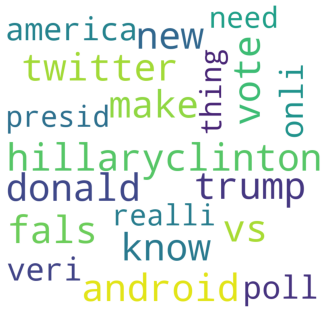

In [59]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white',
                      #stopwords = stopwords, 
                      min_font_size = 10).generate(' '.join(topics[1].values)) 

plt.clf();
plt.figure(figsize = (10, 7), dpi=46, facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

<Figure size 432x288 with 0 Axes>

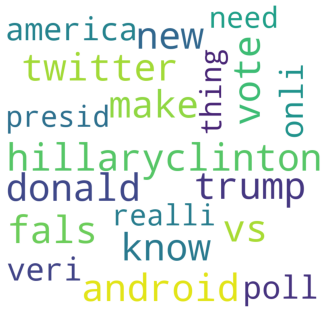

In [60]:
plt.clf();
plt.figure(figsize = (10, 7), dpi=46, facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

<Figure size 432x288 with 0 Axes>

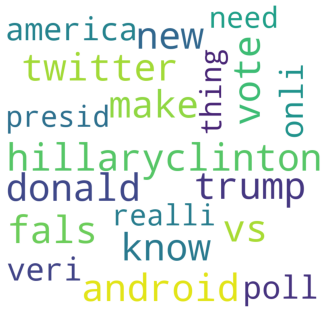

In [61]:
plt.clf();
plt.figure(figsize = (10, 7), dpi=46, facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

A Venn- diagram

## Top 10 applications of NLP
https://www.analyticsvidhya.com/blog/2020/07/top-10-applications-of-natural-language-processing-nlp/

* autocomplete or autocorrect (search engines)
* machine translation (google translate)
* social media monitoring
* chatbots for basic customer queries
* survey analysis
* targeted advertising
* hiring and recruitment
* voice assistants
* grammar checker
* email filtering (e.g. spam filtering)

* [Crowdbreaks](https://www.crowdbreaks.org/): Crowdbreaks is a health trend tracking system. Crowdbreaks collects tweets with keywords that might be related to specific health topics. By using natural language processing and machine learning techniques the system tries to filter relevant from non-relevant content. By providing more meta information (labelling) of the tweets, these algorithms will continuously improve to detect tweets which are truly relevant and understand their content.issues. 

* Sentiment analysis using social media: How people feel about topics, events or products [1](https://sproutsocial.com/insights/social-media-sentiment-analysis/) [2](https://blog.hootsuite.com/social-media-sentiment-analysis-tools/)

## Other questions

What to do when the texts do not have the same length? How to exclude not relevant words? How to make a weighting scheme for our purposes?

How to deal with the 'timeseries' nature of texts? What inputs do neural networks expect?